<a href="https://colab.research.google.com/github/prabhudc/DQ/blob/master/NN_Handwritten_Digit_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwritten Digit Classifier
This project uses Neural Networks to classiy a dataset of handwritten numerals into their corresponding numbers. We use the digits  available out fof the box in sklearn.

In [34]:
# The usual suspects
import pandas as pd
import numpy as np
import math

# Plotting
import matplotlib.pyplot as plt

# Generate data
from sklearn.datasets import load_digits

# Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Metrics
from sklearn.metrics import mean_squared_error, accuracy_score

# Misc
import warnings
warnings.filterwarnings('ignore')

## Load and explore data

In [4]:
data = load_digits()
im_data = pd.DataFrame(data['data'])
im_label = data['target']

In [5]:
# Function to print an image 
def print_img(index):
  plt.imshow(np.array(im_data.iloc[index]).reshape(8,8),cmap='gray')

Visualize the digit dataset and get a better understanding

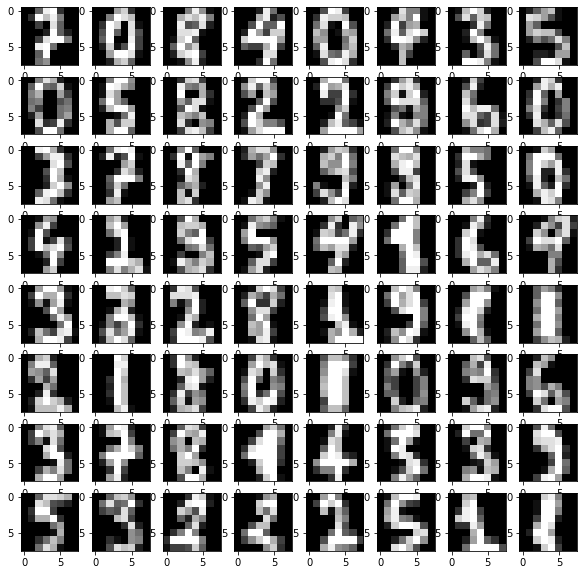

In [6]:
fig = plt.figure(figsize=(10,10))
indexes = np.random.choice(np.arange(im_data.shape[0]),64,replace=False)

for ind in range(len(indexes)):
    ax = fig.add_subplot(8,8,ind+1)
    ax.imshow(data['data'][indexes[ind]].reshape(8,8),cmap='gray')
plt.show()  

## Modelling - KMeans

Define helper functions for modelling

In [7]:
def train(data,labels,k=5):
  clf = KNeighborsClassifier(k)
  clf.fit(data,labels)
  return clf

def cross_validate(data,labels,kfolds=4,k=5):
  fold_size = math.floor(data.shape[0]/kfolds)
  folds = []
  
  mse = [] 
  accuracy_score_folds = []
  for i in range(kfolds):
    # print(i*fold_size,i*fold_size + fold_size)
    # Index of the folds
    test_index = np.arange(i*fold_size,i*fold_size + fold_size)
    
    # Training data
    train_data = data.iloc[~data.index.isin(test_index)]
    train_labels = labels[~data.index.isin(test_index)]

    # Testing data 
    test_data = data.iloc[test_index]
    test_labels = labels[test_index]

    clf = train(train_data,train_labels,k)   

    y_pred = clf.predict(test_data)
    
    accuracy_score_folds.append(accuracy_score(test_labels,y_pred))
    
  return np.mean(accuracy_score_folds)


k-Fold validation run on k-Means with 4 folds

In [8]:
cross_validate(im_data,im_label,4,1)

0.9671492204899776

Let us compare and evaluate how the accuracy evolves across the hyperparameter - k

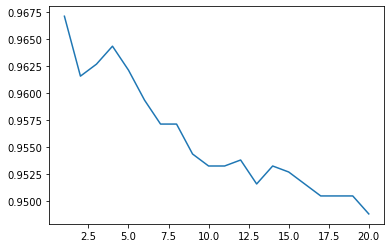

In [9]:
k_list = np.arange(1,21)
accuracies = []
for k in k_list:
  accuracies.append(cross_validate(im_data,im_label,4,k))

plt.plot(k_list,accuracies )
plt.show()

## Modelling - Neural Nets

In [31]:
def train_nn(data,labels,layers):
  clf = MLPClassifier(hidden_layer_sizes=layers, activation='relu', max_iter=1000)
  clf.fit(data,labels)
  return clf

def cross_validate_nn(data,labels,kfolds=4,layers=(1)):
  fold_size = math.floor(data.shape[0]/kfolds)
  folds = []
  
  mse = [] 
  accuracy_score_folds = []
  for i in range(kfolds):
    # print(i*fold_size,i*fold_size + fold_size)
    # Index of the folds
    test_index = np.arange(i*fold_size,i*fold_size + fold_size)
    
    # Training data
    train_data = data.iloc[~data.index.isin(test_index)]
    train_labels = labels[~data.index.isin(test_index)]

    # Testing data 
    test_data = data.iloc[test_index]
    test_labels = labels[test_index]

    clf = train_nn(train_data,train_labels,layers)   

    y_pred = clf.predict(test_data)
    
    accuracy_score_folds.append(accuracy_score(test_labels,y_pred))
    
  return np.mean(accuracy_score_folds)

Single Nueron and Single layer

In [35]:
cross_validate_nn(im_data,im_label,4,(1,))

0.20211581291759464

Larger number of neurons

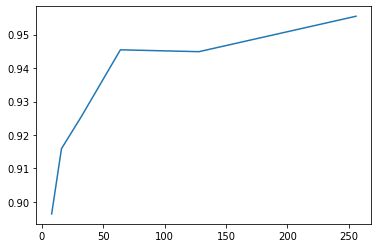

In [37]:
neurons = [8, 16, 32, 64, 128, 256]
accuracies = []
for neuron in neurons:
  accuracies.append(cross_validate_nn(im_data,im_label,4,(neuron,)))
plt.plot(neurons,accuracies )
plt.show()

As the number of neurons increased, the accuracy vastly improved as well to as much as 95.5


In [38]:
accuracies[5]

0.955456570155902

Two layers - 64 and 64

In [39]:
cross_validate_nn(im_data,im_label,4,(64,64))

0.9432071269487751

In [43]:
# neurons = [(10,10,10), (64,64,64), (128,128,128) ]
neurons = [ 10, 64, 128]
accuracies = []
for neuron in neurons:
  print(neuron)
  accuracies.append(cross_validate_nn(im_data,im_label,6,(neuron,neuron,neuron)))

10
64
128


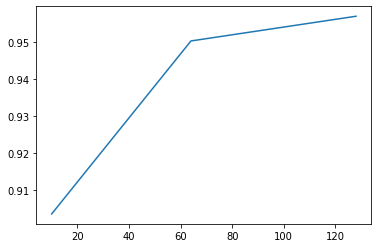

In [44]:
plt.plot(neurons,accuracies )
plt.show()

In [47]:
accuracies[2]

0.9570791527313268